In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Загрузим и посмотрим на датасет

In [2]:
pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

airflights = pd.read_csv('airflights.csv')

In [3]:
airflights.sample(10)

,flight_id,scheduled_departure,departure_airport,arrival_airport,aircraft_code,flight_duration_minutes,total_seats,economy_seats_cnt,business_seats_cnt,total_tickets,economy_tickets_cnt,business_tickets_cnt,total_amount,economy_tickets_amount,business_tickets_amount
57,136485,2017-01-27 10:05:00.000000,AAQ,SVO,733,100,130,118,12,106,97,9,1520000,1190600,329400
38,136360,2017-02-05 10:05:00.000000,AAQ,SVO,733,100,130,118,12,97,86,11,1455400,1052800,402600
125,136953,2017-02-27 09:25:00.000000,AAQ,EGO,SU9,50,97,85,12,97,85,12,765300,538500,226800
61,136514,2017-02-07 06:10:00.000000,AAQ,NOZ,733,299,130,118,12,0,0,0,0,0,0
91,136733,2017-01-09 09:25:00.000000,AAQ,EGO,SU9,51,97,85,12,94,82,12,746400,519600,226800
92,136754,2017-02-06 09:25:00.000000,AAQ,EGO,SU9,49,97,85,12,90,78,12,721200,494400,226800
101,136802,2017-02-26 09:25:00.000000,AAQ,EGO,SU9,50,97,85,12,96,85,11,746400,538500,207900
11,136172,2017-01-15 10:05:00.000000,AAQ,SVO,733,99,130,118,12,110,99,11,1617600,1215000,402600
88,136709,2017-01-15 09:25:00.000000,AAQ,EGO,SU9,50,97,85,12,87,76,11,689700,481800,207900
99,136780,2017-02-24 09:25:00.000000,AAQ,EGO,SU9,50,97,85,12,89,77,12,714900,488100,226800


In [4]:
airflights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   flight_id                127 non-null    int64 
 1   scheduled_departure      127 non-null    object
 2   departure_airport        127 non-null    object
 3   arrival_airport          127 non-null    object
 4   aircraft_code            127 non-null    object
 5   flight_duration_minutes  127 non-null    int64 
 6   total_seats              127 non-null    int64 
 7   economy_seats_cnt        127 non-null    int64 
 8   business_seats_cnt       127 non-null    int64 
 9   total_tickets            127 non-null    int64 
 10  economy_tickets_cnt      127 non-null    int64 
 11  business_tickets_cnt     127 non-null    int64 
 12  total_amount             127 non-null    int64 
 13  economy_tickets_amount   127 non-null    int64 
 14  business_tickets_amount  127 non-null    i

In [5]:
airflights['scheduled_departure'] = pd.to_datetime(airflights['scheduled_departure'])

In [6]:
airflights.describe(include=np.number).transpose()

,count,mean,std,min,25%,50%,75%,max
flight_id,127.0,1.365336e+05,252.498327,136119.0,136313.0,136540.0,136757.5,136956.0
flight_duration_minutes,127.0,9.137795e+01,64.377474,49.0,50.0,99.0,100.0,312.0
total_seats,127.0,1.146693e+02,16.523699,97.0,97.0,130.0,130.0,130.0
economy_seats_cnt,127.0,1.026693e+02,16.523699,85.0,85.0,118.0,118.0,118.0
business_seats_cnt,127.0,1.200000e+01,0.000000,12.0,12.0,12.0,12.0,12.0
total_tickets,127.0,9.444882e+01,29.589710,0.0,89.5,97.0,110.0,130.0
economy_tickets_cnt,127.0,8.442520e+01,27.030999,0.0,78.0,85.0,101.0,118.0
business_tickets_cnt,127.0,1.002362e+01,3.087262,0.0,10.0,11.0,12.0,12.0
total_amount,127.0,1.093131e+06,552533.470752,0.0,714600.0,765300.0,1610300.0,1886000.0
economy_tickets_amount,127.0,8.172756e+05,436962.866774,0.0,494100.0,538500.0,1238200.0,1446800.0


In [7]:
airflights.describe(include=np.object).transpose()

,count,unique,top,freq
departure_airport,127,1,AAQ,127
arrival_airport,127,3,EGO,59
aircraft_code,127,2,733,68


In [8]:
def quick_look_numeric(df, feature):
    plt.figure(figsize=(15, 5))
    plt.subplot(121)
    plt.hist(x=df[feature].dropna())
    plt.title(f'{feature} distribution\n')
    plt.xlabel(feature)
    plt.ylabel('count')

    plt.subplot(122)
    sns.boxplot(data=df, x=feature)
    plt.title(f'{feature} boxplot\n')
    plt.xlabel(feature)
    plt.show()
    
    display(df[feature].describe())
    print(f'Пропуски: {df[feature].isna().sum()}')


def quick_look_categorical(df, feature, orient='v', height=15):
    if orient == 'v':
        plt.figure(figsize=(15, height))
        sns.countplot(data=df, x=feature, orient=orient, order=df[feature].value_counts().index)
    else:
        plt.figure(figsize=(15, height))
        sns.countplot(data=df, y=feature, orient=orient, order=df[feature].value_counts().index)
    plt.title(f'{feature} distribution\n')
    plt.xlabel(feature)
    plt.ylabel('count')
    plt.show()

    display(df[feature].astype('category').describe())
    print(f'Пропуски: {df[feature].isna().sum()}')

### EDA

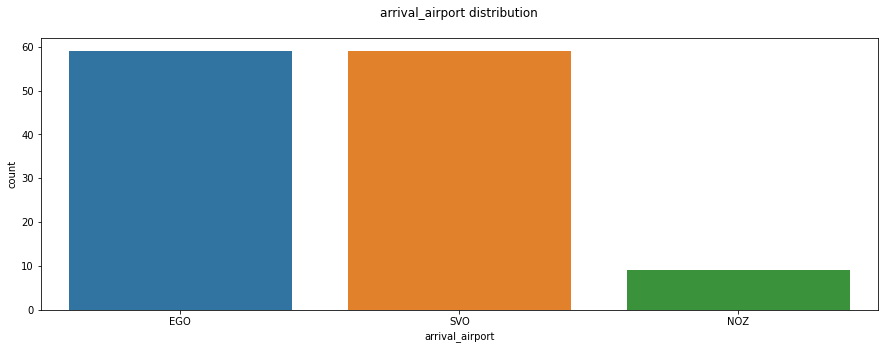

count     127
unique      3
top       SVO
freq       59
Name: arrival_airport, dtype: object

Пропуски: 0


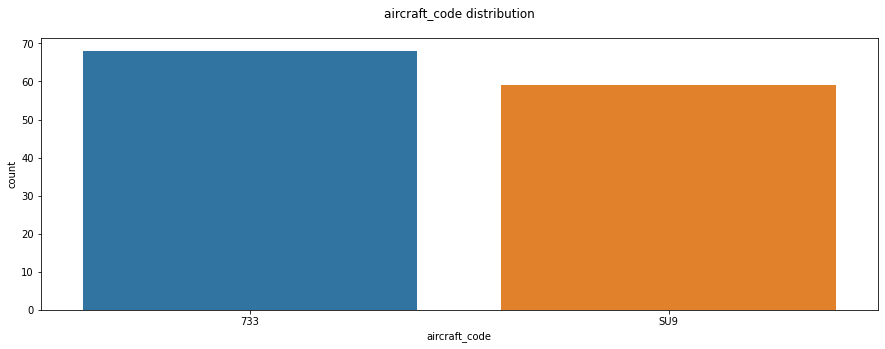

count     127
unique      2
top       733
freq       68
Name: aircraft_code, dtype: object

Пропуски: 0


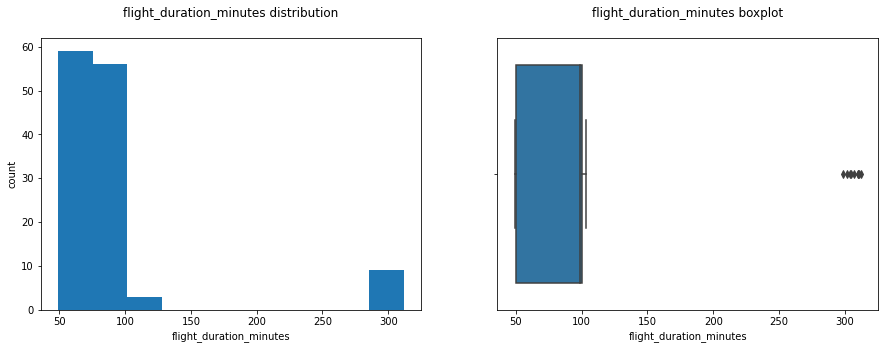

count    127.000000
mean      91.377953
std       64.377474
min       49.000000
25%       50.000000
50%       99.000000
75%      100.000000
max      312.000000
Name: flight_duration_minutes, dtype: float64

Пропуски: 0


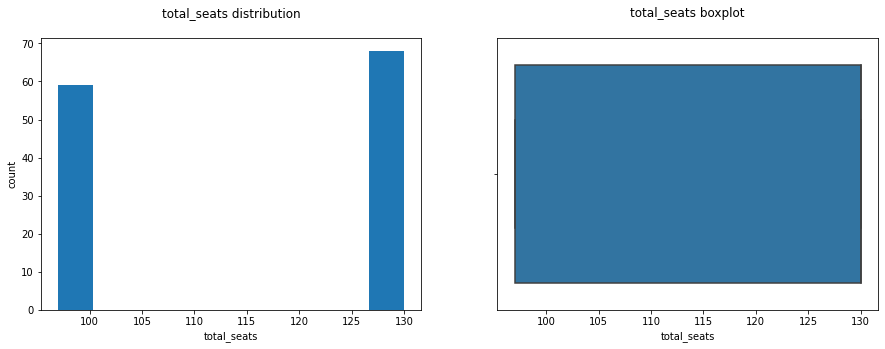

count    127.000000
mean     114.669291
std       16.523699
min       97.000000
25%       97.000000
50%      130.000000
75%      130.000000
max      130.000000
Name: total_seats, dtype: float64

Пропуски: 0


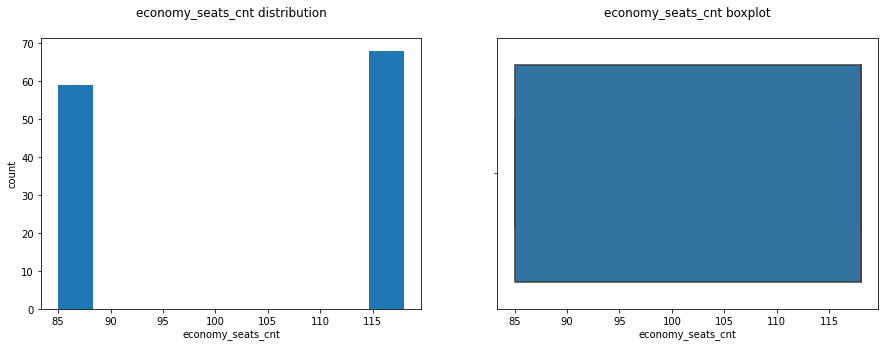

count    127.000000
mean     102.669291
std       16.523699
min       85.000000
25%       85.000000
50%      118.000000
75%      118.000000
max      118.000000
Name: economy_seats_cnt, dtype: float64

Пропуски: 0


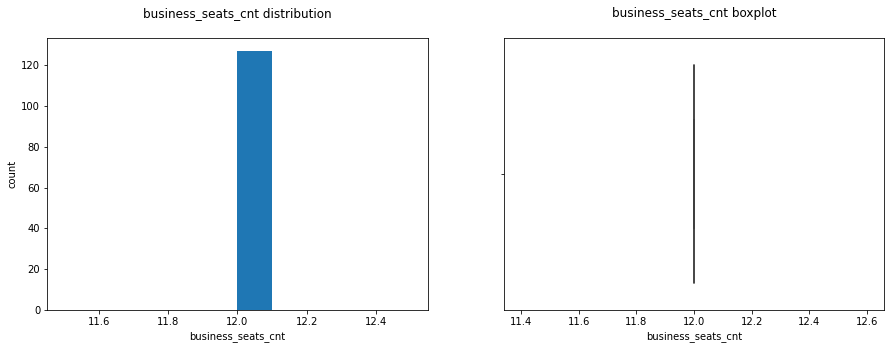

count    127.0
mean      12.0
std        0.0
min       12.0
25%       12.0
50%       12.0
75%       12.0
max       12.0
Name: business_seats_cnt, dtype: float64

Пропуски: 0


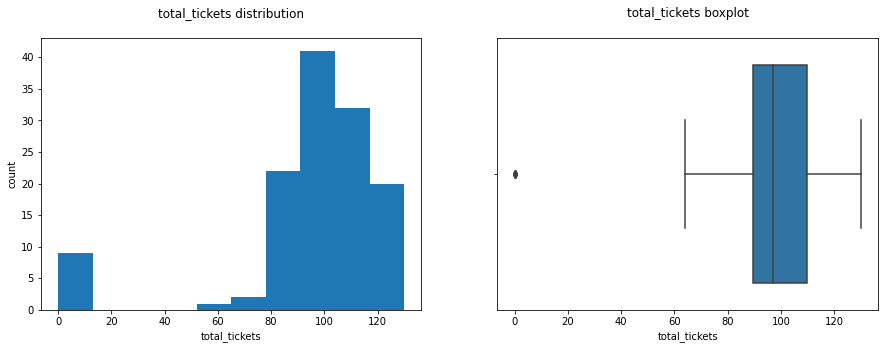

count    127.000000
mean      94.448819
std       29.589710
min        0.000000
25%       89.500000
50%       97.000000
75%      110.000000
max      130.000000
Name: total_tickets, dtype: float64

Пропуски: 0


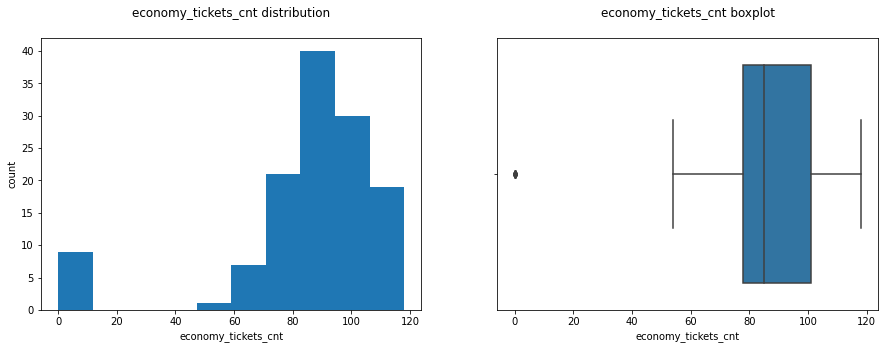

count    127.000000
mean      84.425197
std       27.030999
min        0.000000
25%       78.000000
50%       85.000000
75%      101.000000
max      118.000000
Name: economy_tickets_cnt, dtype: float64

Пропуски: 0


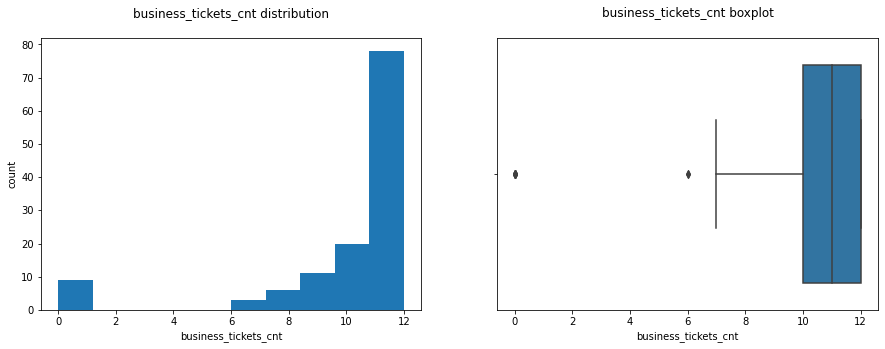

count    127.000000
mean      10.023622
std        3.087262
min        0.000000
25%       10.000000
50%       11.000000
75%       12.000000
max       12.000000
Name: business_tickets_cnt, dtype: float64

Пропуски: 0


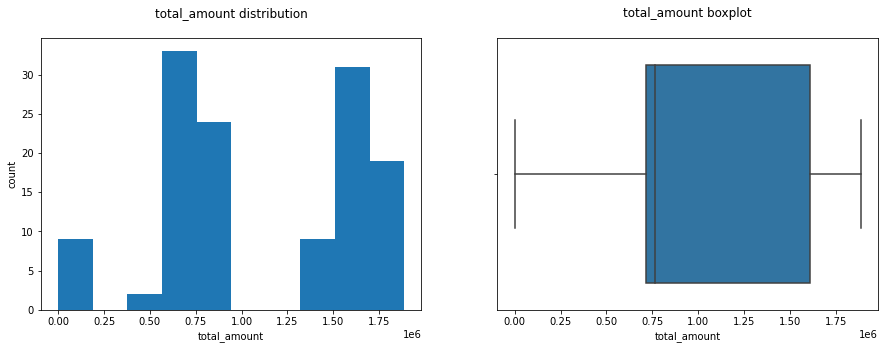

count    1.270000e+02
mean     1.093131e+06
std      5.525335e+05
min      0.000000e+00
25%      7.146000e+05
50%      7.653000e+05
75%      1.610300e+06
max      1.886000e+06
Name: total_amount, dtype: float64

Пропуски: 0


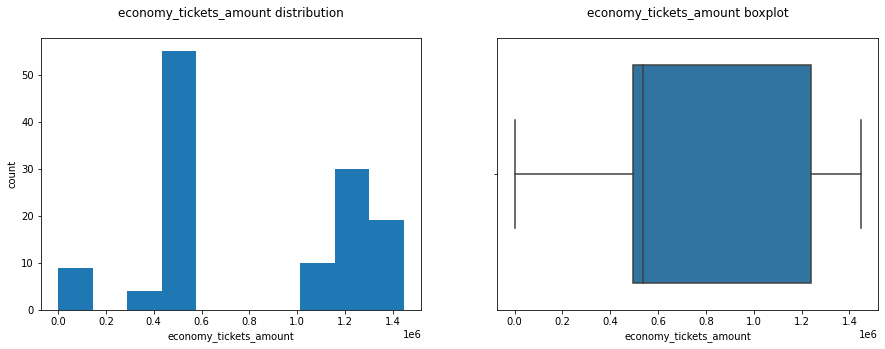

count    1.270000e+02
mean     8.172756e+05
std      4.369629e+05
min      0.000000e+00
25%      4.941000e+05
50%      5.385000e+05
75%      1.238200e+06
max      1.446800e+06
Name: economy_tickets_amount, dtype: float64

Пропуски: 0


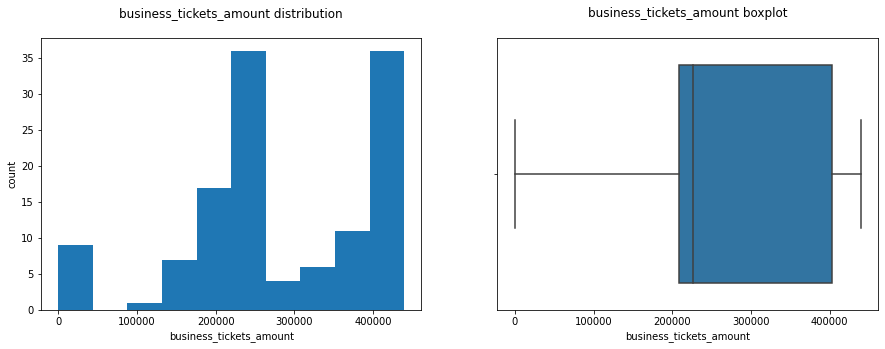

count       127.000000
mean     275855.905512
std      120638.893577
min           0.000000
25%      207900.000000
50%      226800.000000
75%      402600.000000
max      439200.000000
Name: business_tickets_amount, dtype: float64

Пропуски: 0


In [9]:
# Из рассмотрения исключаем 'flight_id' - он уникален, 'departure_airport' - он один
for feature in airflights.drop(['flight_id', 'departure_airport'], axis=1):
    if airflights[feature].dtype == 'object':
        quick_look_categorical(airflights, feature, height=5)
    elif airflights[feature].dtype == 'int64':
        quick_look_numeric(airflights, feature)

In [10]:
# Пропусков в данных нет. Из общей картины выбиваются рейсы с кол-вом билетов = 0, 
# на них стоит обратить внимание.

In [11]:
airflights[airflights['total_tickets'] == 0]

,flight_id,scheduled_departure,departure_airport,arrival_airport,aircraft_code,flight_duration_minutes,total_seats,economy_seats_cnt,business_seats_cnt,total_tickets,economy_tickets_cnt,business_tickets_cnt,total_amount,economy_tickets_amount,business_tickets_amount
59,136511,2017-02-21 06:10:00,AAQ,NOZ,733,310,130,118,12,0,0,0,0,0,0
60,136513,2017-02-28 06:10:00,AAQ,NOZ,733,310,130,118,12,0,0,0,0,0,0
61,136514,2017-02-07 06:10:00,AAQ,NOZ,733,299,130,118,12,0,0,0,0,0,0
62,136523,2017-01-10 06:10:00,AAQ,NOZ,733,312,130,118,12,0,0,0,0,0,0
63,136540,2017-01-17 06:10:00,AAQ,NOZ,733,307,130,118,12,0,0,0,0,0,0
64,136544,2017-01-31 06:10:00,AAQ,NOZ,733,304,130,118,12,0,0,0,0,0,0
65,136546,2017-01-03 06:10:00,AAQ,NOZ,733,302,130,118,12,0,0,0,0,0,0
66,136560,2017-01-24 06:10:00,AAQ,NOZ,733,305,130,118,12,0,0,0,0,0,0
67,136567,2017-02-14 06:10:00,AAQ,NOZ,733,311,130,118,12,0,0,0,0,0,0


In [12]:
# Посмотрим покупались ли вообще билеты в аэропорт NOZ (Novokuznetsk)
airflights[(airflights['arrival_airport'] == 'NOZ') & (airflights['total_tickets'] > 0)]

,flight_id,scheduled_departure,departure_airport,arrival_airport,aircraft_code,flight_duration_minutes,total_seats,economy_seats_cnt,business_seats_cnt,total_tickets,economy_tickets_cnt,business_tickets_cnt,total_amount,economy_tickets_amount,business_tickets_amount


In [13]:
# На рейсы в аэропорт 'NOZ' (Novokuznetsk) вообще не покупались билеты, рекомендации - эти рейсы убрать
empty_flights = airflights[airflights['arrival_airport'] == 'NOZ'].copy()
empty_flights

,flight_id,scheduled_departure,departure_airport,arrival_airport,aircraft_code,flight_duration_minutes,total_seats,economy_seats_cnt,business_seats_cnt,total_tickets,economy_tickets_cnt,business_tickets_cnt,total_amount,economy_tickets_amount,business_tickets_amount
59,136511,2017-02-21 06:10:00,AAQ,NOZ,733,310,130,118,12,0,0,0,0,0,0
60,136513,2017-02-28 06:10:00,AAQ,NOZ,733,310,130,118,12,0,0,0,0,0,0
61,136514,2017-02-07 06:10:00,AAQ,NOZ,733,299,130,118,12,0,0,0,0,0,0
62,136523,2017-01-10 06:10:00,AAQ,NOZ,733,312,130,118,12,0,0,0,0,0,0
63,136540,2017-01-17 06:10:00,AAQ,NOZ,733,307,130,118,12,0,0,0,0,0,0
64,136544,2017-01-31 06:10:00,AAQ,NOZ,733,304,130,118,12,0,0,0,0,0,0
65,136546,2017-01-03 06:10:00,AAQ,NOZ,733,302,130,118,12,0,0,0,0,0,0
66,136560,2017-01-24 06:10:00,AAQ,NOZ,733,305,130,118,12,0,0,0,0,0,0
67,136567,2017-02-14 06:10:00,AAQ,NOZ,733,311,130,118,12,0,0,0,0,0,0


In [14]:
# Удалим эти рейсы из датасета и посмотрим на распределение признаков
airflights = airflights[airflights['arrival_airport'] != 'NOZ'].copy()
airflights

,flight_id,scheduled_departure,departure_airport,arrival_airport,aircraft_code,flight_duration_minutes,total_seats,economy_seats_cnt,business_seats_cnt,total_tickets,economy_tickets_cnt,business_tickets_cnt,total_amount,economy_tickets_amount,business_tickets_amount
0,136119,2017-01-03 10:05:00,AAQ,SVO,733,101,130,118,12,113,102,11,1653000,1250400,402600
1,136120,2017-02-24 10:05:00,AAQ,SVO,733,99,130,118,12,109,98,11,1605400,1202800,402600
2,136122,2017-01-08 10:05:00,AAQ,SVO,733,100,130,118,12,97,87,10,1431000,1065000,366000
3,136130,2017-02-13 10:05:00,AAQ,SVO,733,99,130,118,12,107,97,10,1556600,1190600,366000
4,136131,2017-01-28 10:05:00,AAQ,SVO,733,99,130,118,12,124,112,12,1812800,1373600,439200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,136936,2017-01-02 09:25:00,AAQ,EGO,SU9,50,97,85,12,82,73,9,632400,462300,170100
123,136937,2017-01-03 09:25:00,AAQ,EGO,SU9,50,97,85,12,81,72,9,626100,456000,170100
124,136951,2017-02-02 09:25:00,AAQ,EGO,SU9,49,97,85,12,90,78,12,720600,493800,226800
125,136953,2017-02-27 09:25:00,AAQ,EGO,SU9,50,97,85,12,97,85,12,765300,538500,226800


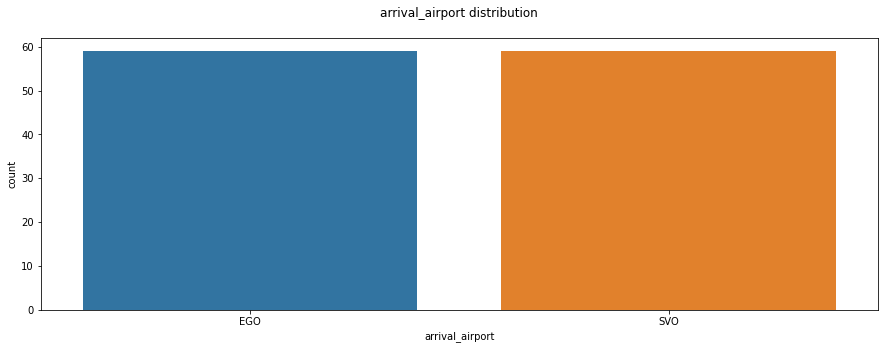

count     118
unique      2
top       SVO
freq       59
Name: arrival_airport, dtype: object

Пропуски: 0


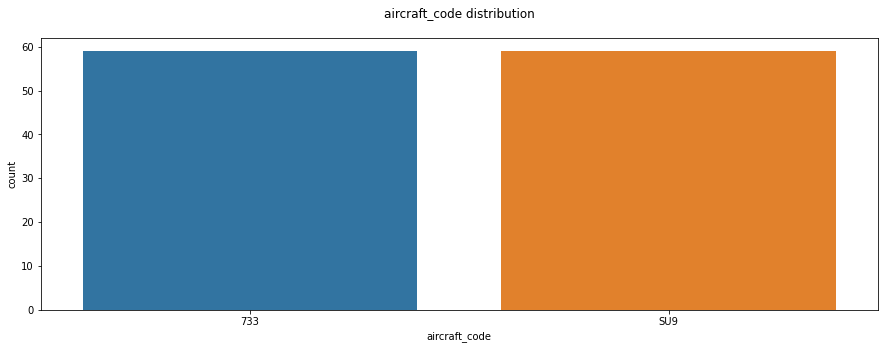

count     118
unique      2
top       SU9
freq       59
Name: aircraft_code, dtype: object

Пропуски: 0


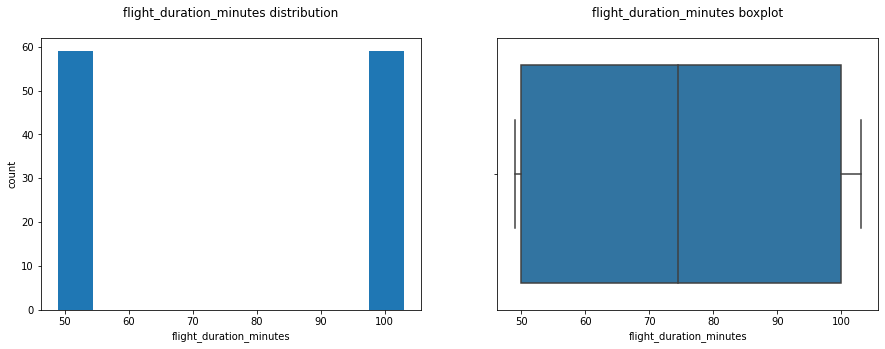

count    118.000000
mean      74.957627
std       24.992783
min       49.000000
25%       50.000000
50%       74.500000
75%      100.000000
max      103.000000
Name: flight_duration_minutes, dtype: float64

Пропуски: 0


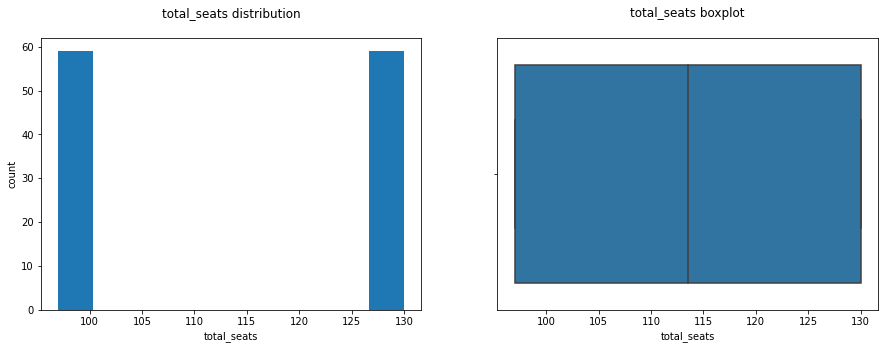

count    118.000000
mean     113.500000
std       16.570363
min       97.000000
25%       97.000000
50%      113.500000
75%      130.000000
max      130.000000
Name: total_seats, dtype: float64

Пропуски: 0


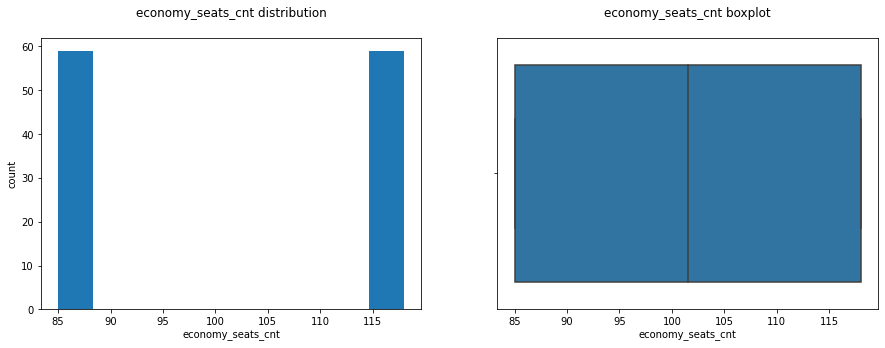

count    118.000000
mean     101.500000
std       16.570363
min       85.000000
25%       85.000000
50%      101.500000
75%      118.000000
max      118.000000
Name: economy_seats_cnt, dtype: float64

Пропуски: 0


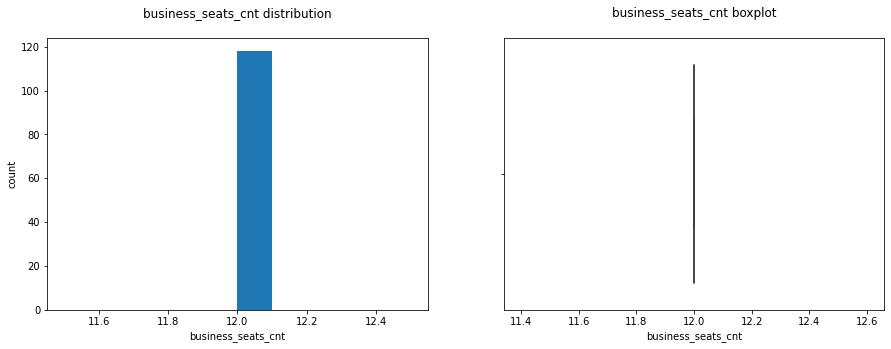

count    118.0
mean      12.0
std        0.0
min       12.0
25%       12.0
50%       12.0
75%       12.0
max       12.0
Name: business_seats_cnt, dtype: float64

Пропуски: 0


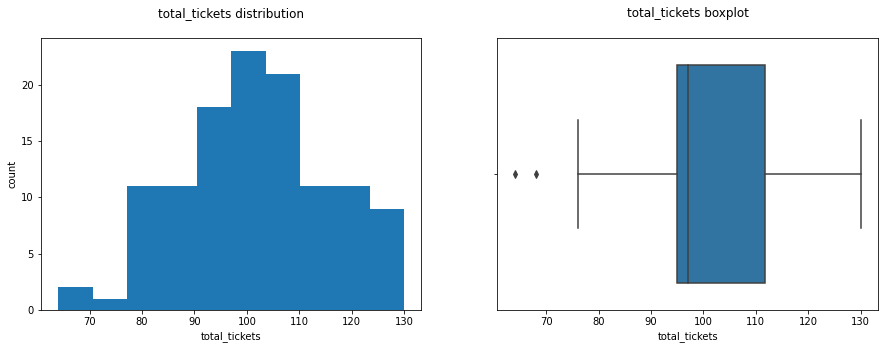

count    118.000000
mean     101.652542
std       14.295643
min       64.000000
25%       95.000000
50%       97.000000
75%      111.750000
max      130.000000
Name: total_tickets, dtype: float64

Пропуски: 0


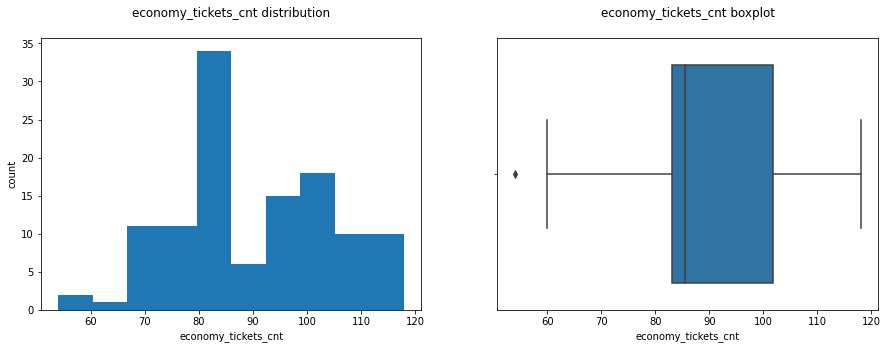

count    118.000000
mean      90.864407
std       14.028003
min       54.000000
25%       83.000000
50%       85.500000
75%      101.750000
max      118.000000
Name: economy_tickets_cnt, dtype: float64

Пропуски: 0


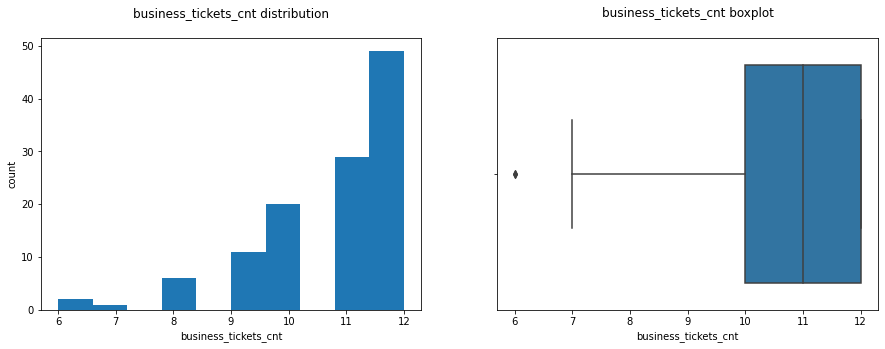

count    118.000000
mean      10.788136
std        1.395057
min        6.000000
25%       10.000000
50%       11.000000
75%       12.000000
max       12.000000
Name: business_tickets_cnt, dtype: float64

Пропуски: 0


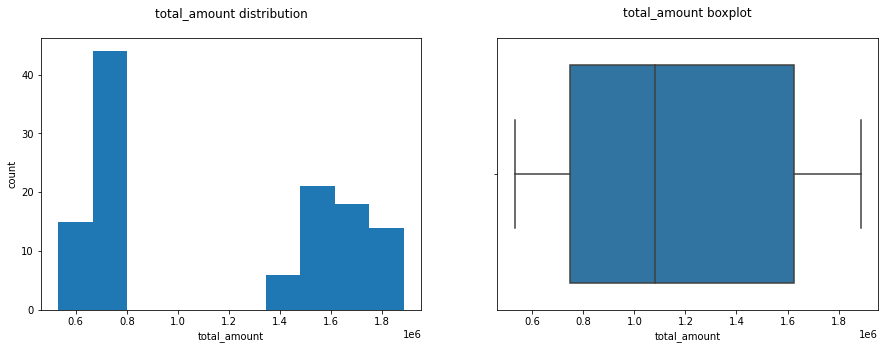

count    1.180000e+02
mean     1.176506e+06
std      4.794251e+05
min      5.310000e+05
25%      7.464000e+05
50%      1.081650e+06
75%      1.625850e+06
max      1.886000e+06
Name: total_amount, dtype: float64

Пропуски: 0


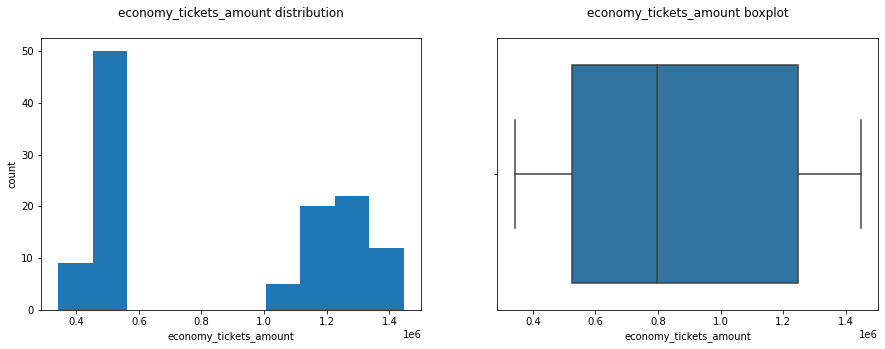

count    1.180000e+02
mean     8.796102e+05
std      3.877180e+05
min      3.420000e+05
25%      5.259000e+05
50%      7.956500e+05
75%      1.246750e+06
max      1.446800e+06
Name: economy_tickets_amount, dtype: float64

Пропуски: 0


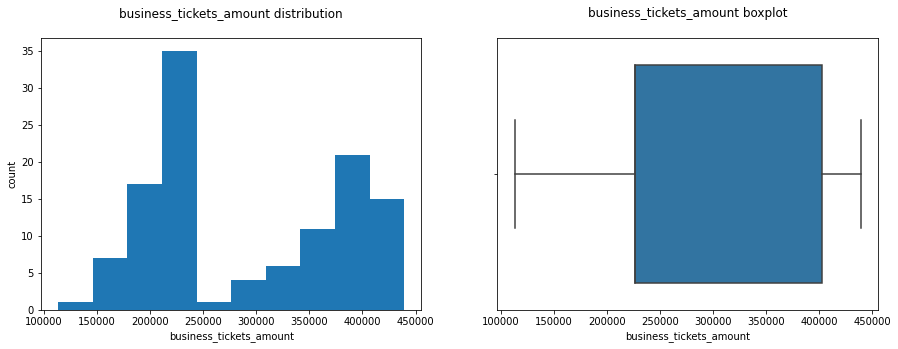

count       118.000000
mean     296895.762712
std       96815.426116
min      113400.000000
25%      226800.000000
50%      226800.000000
75%      402600.000000
max      439200.000000
Name: business_tickets_amount, dtype: float64

Пропуски: 0


In [15]:
# Из рассмотрения исключаем 'flight_id' - он уникален, 'departure_airport' - он один
for feature in airflights.drop(['flight_id', 'departure_airport'], axis=1):
    if airflights[feature].dtype == 'object':
        quick_look_categorical(airflights, feature, height=5)
    elif airflights[feature].dtype == 'int64':
        quick_look_numeric(airflights, feature)       

#### Промежуточные выводы:
Интересующие нас рейсы летают из Анапы(AAQ) в двух направлениях - Шереметьево(SVO) и Белгород(EGO).
Используются два типа самолетов - Boeing 737-300 (733) и Sukhoi Superjet-100 (SU9)
Еще есть перелеты в Новокузнецк(NOZ), но они порожние 

## Определение убыточных рейсов по себестоимости рейса
http://storage.mstuca.ru/jspui/bitstream/123456789/7904/3/%D0%9F%D0%BE%D1%81%D0%BE%D0%B1%D0%B8%D0%B5%20%D0%B4%D0%BB%D1%8F%20%D0%B2%D1%8B%D0%BF%D0%BE%D0%BB%D0%BD%D0%B5%D0%BD%D0%B8%D1%8F%20%D0%B4%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D0%B5%D0%B3%D0%BE%20%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D1%8F%20%D0%BF%D0%BE%20%D1%8D%D0%BA%D0%BE%D0%BD%D0%BE%D0%BC%D0%B8%D0%BA%D0%B5.pdf
Методика расчета себестоимости рейсов воздушных судов сводится к расчетам или выделению трех групп статей затрат, которые различаются способами расчета:
<ol>
<li>прямые переменные расходы</li>
<li>прямые постоянные расходы</li>
<li>косвенные или накладные расходы</li>
</ol>
<img src="sebes.jpeg">


### ОПРЕДЕЛЕНИЕ ПРЯМЫХ ПЕРЕМЕННЫХ РАСХОДОВ
К данной группе расходов относятся следующие калькуляционные статьи:
<lo>
<li>Расходы на авиаГСМ.</li>
<b>Rгсм = Sгсм * Hрасх * Tрейс * Kспец * Kнепр + Sгсм * Hрасх * Tанз</b><br>
<i>
где:<br>
    
    Sгсм - стоимость авиаГСМ в аэропорту вылета, тыс. руб/т
    Hрасх - часовой расход топлива конкретного типа ВС, т/час
    Tрейс - время рейса по направлению, ч
    Tанз – время аэронавигационного запаса (принимается равным 1 часу)
    Kспец - коэффициент, учитывающий расходы на масло и спецжидкости (условно принимается равным 1,01)
    Kнепр - коэффициент, учитывающий непроизводственный налет и время работы двигателей на земле (принимается равным 1,33-1,36)
    
<li>Аэропортовые расходы.</li>
<b>Rап = Rвп + Rбез + Rав + Rмо + Rпасс + Rото + Rпроч</b><br>
<i>
где:<br>
    
    Rвп – платежи за обеспечение взлета-посадки ВС, тыс. руб;
    Rвп = Gвзл * Sвп
    Gвзл - взлетный вес ВС т;
    Sвп - ставка сбора за взлет-посадку в аэропорту вылета, тыс. руб/т;

    Rбез – платежи за обеспечение авиационной безопасности, тыс. руб;
    Rбез = Gвзл * Sбез
    Gвзл - взлетный вес ВС;
    Sбез - ставка сбора за обеспечение авиационной безопасности в аэропорту вылета, тыс. руб./т    

    Rав - платежи за пользование аэровокзалом, тыс. руб;
    Rав = Qпасс * Sав
    Qпасс - средняя плановая пассажирская коммерческая загрузка, пасс;
    Sав - ставка сбора за пользование аэровокзалом в аэропорту вылета, тыс. руб./пасс;
    
    Rмо - платежи за метеообеспечение, тыс. руб;
    Rмо = Sмо
    ставка сбора за метеообеспечение в аэропорту вылета, тыс. руб./с.-в
   
    Rпасс – платежи за коммерческое обслуживание пассажиров, тыс. руб;
    Rпасс = Qпасс * Sпасс
    Qпасс - средняя плановая пассажирская коммерческая загрузка, пасс;
    Sпасс - тариф за обслуживание одного пассажира в аэропорту вылета, тыс. руб./пасс. 
        
    Rото - платежи за оперативное техническое обслуживание (ОТО), тыс. руб;
    Rото = Tото * Sото * Kдоп
    Tото - трудоемкость обслуживания вылета и встречи (приемки-выпуска);
    Sото – тариф за выполнение работ по ОТО, тыс. руб./ нормо-час;
    Kдоп - коэффициент, учитывающий дополнительные услуги и работы (принять равным 1,15).
    
    Rпроч - платежи за наземное обслуживание и прочие услуги, тыс. руб
    Rпроч = 0.25 * (Rвп + Rбез + Rав + Rмо + Rпасс + Rгруз + Rото)  
    Платежи по всем остальным услугам аэропорта и «хендлинговых» компаний условно принимаются в размере, равном 25% от суммы всех аэропортовых расходов.
</i>
<li>Расходы за аэронавигационное обеспечение.</li>
<b>Rаэно = Sаэно * Lвл</b><br>
<i>
где:<br>
    
    Sаэно - ставка сбора за АЭНО на трассах и местных ВЛ, установленная взависимости от максимальной взлетной массы ВС, без НДС, тыс.руб.
    Lвл – протяженность участка беспосадочного полета, км.
</i>    
<li>Расходы на питание пассажиров и экипажей в рейсе.</li>
<b>Rпит = (Qпасс + Nэк) * Sпит * Kкл</b><br>
<i>
где:<br>
    
    Nэк - количество членов летного и кабинного экипажей чел;
    Sпит- стоимость бортпитания с учетом бортпосуды в расчете на одного человека (принимается условно в размере 400 рублей)
    Ккл – коэффициент, учитывающий стоимость питания и посуды для пассажиров с повышенным классом обслуживания (принимается условно равным 1,4).
    
</i>
<li>Расходы на содержание и питание экипажей в аэропортах.</li>
<b>Rэк = Nэк * Sсут</b>
<i>
где:<br>
    
     Sсут - принимается условно: 2500 рублей 
</i>
<li>Расходы, связанные с отчислениями агентствам.</li>
<b>Принимаем учсловно за 5% от суммы доходов</b>
    
<li>Расходы по сдельной составляющей заработной платы летного состава и бортпроводников.</li>
<b>Принимаем учсловно за 5% от суммы доходов</b>

<li>Расходы на социальные отчисления по сдельной составляющей заработной платы летного состава и бортпроводников.</li>
<b>Принимаем учсловно за 5% от суммы доходов</b>

<li>Расходы на страхование пассажиров, грузов.</li>
<b>Принимаем учсловно за 5% от суммы доходов</b>

<lo>

### ОПРЕДЕЛЕНИЕ ПРЯМЫХ ПОСТОЯННЫХ РАСХОДОВ
К данной группе расходов относятся:
<lo>
<li>Расходы, связанные с амортизацией/лизингом ВС.</li>
<li>Расходы на периодическое техническое обслуживание.</li>
<li>Расходы на капитальный ремонт ВС и АД.</li>
<li>Расходы на постоянную составляющую заработной платы летного состава и бортпроводников.</li>
<li>Расходы, связанные с социальными отчислениями на постоянную составляющую заработной платы летного состава и бортпроводников.</li>
<li>Расходы на страхование ВС, профессиональной ответственности и ответственности перед третьими лицами.</li>
</lo>
<b>Для упрощения расчетов предлагается принять общую сумму этих расходов равной 24 % от стоимости проданных билетов</b>

### ОПРЕДЕЛЕНИЕ КОСВЕННЫХ НАКЛАДНЫХ РАСХОДОВ
<b>Для упрощения принимаются равными 3 % от суммы прямых переменных и прямых постоянных расходов по рейсу</b>

### Итак нам "всего лишь" надо посчитать общую сумму расходов:

Прямые расходы:
    
    Rгсм = Sгсм * Hрасх * Tрейс * Kспец * Kнепр + Sгсм * Hрасх * Tанз
    Rап = (Gвзл * Sвп) + (Gвзл * Sбез) + (Qпасс * Sав) + Sмо + (Qпасс * Sпасс) + (Tото * Sото * Kдоп) 
    Rпроч = 0.25 * Rап
    Rаэно = Sаэно * Lвл
    Rпит = (Qпасс + Nэк) * Sпит * Kкл
    Rэк = Nэк * Sсут

(далее в скобках модель самолета, префикс ds - информация из датасета)

Sгсм = cтомость топлива (без НДС) в аэропорту города Анапа составлял в январе 2017 - 41435 руб/тн, в феврале 2017 - 39553 руб/тн и в декабре 2017 - 47101 руб/тн (https://favt.gov.ru/dejatelnost-ajeroporty-i-ajerodromy-ceny-na-aviagsm/)

Hрасх = для перелетов используются самолеты Boing 737-300 с часовым расход топлива - 2600 кг/ч (https://www.airlines-inform.ru/commercial-aircraft/boeing-737-300.html) и Sukhoi Superjet-100 c часовым расходом топлива 1700 кг/ч (http://superjet.wikidot.com/wiki:rashod-topliva#).

    Tрейс = ds.flight_duration_minutes / 60 ч.
    Kспец = 1.01
    Kнепр = 1.33
    Tанз = 1 ч.
    Gвзл(733) = 60 т.
    Gвзл(SU9) = 45 т.
    Sвп = 301 р./т.
    Sбез = 168 р./т.
    Qпасс = df.total_tickets
    Sав = 60 р./пасс.
    Sмо = 2410 р.
    Sпасс = 252 р./пасс.
    Sото = 1200 р./ч.
    Tото(733) = 9.2 ч.
    Tото(SU9) = 7.0 ч.
    Kдоп = 1.15
    Sаэно = 336.0
    L(AAQ-SVO) = 1200 км.
    L(AAQ-EGO) = 650 км.
    Nэк(733) = 6 
    Nэк(SU9) = 6 
    Sпит = 400 р.
    Kкл = 1.4
    Sсут = 2500 р.

In [16]:
fuel_cost_no_nds = {
    1: 41435,
    2: 39553,
    12: 47101
}

fuel_cost = { k: v + v * 0.2 for k, v in fuel_cost_no_nds.items()}

aircraft_tth = {
    '733': {
        'Hрасх': 2600,
        'Gвзл': 60,
        'Nэк': 6,
        'Tото': 9.2
    },
    'SU9': {
        'Hрасх': 1700,
        'Gвзл': 45,
        'Nэк': 6,
        'Tото': 7.0
    }    
}
distance = {
    'SVO': 1200,
    'EGO': 650
}

Kспец = 1.01
Kнепр = 1.33
Tанз = 1 
Sвп = 301 
Sбез = 168 
Sав = 60 
Sмо = 2410 
Sпасс = 252 
Sото = 1200 
Kдоп = 1.15
Sаэно = 336.0
Sпит = 400
Kкл = 1.4
Sсут = 2500

def calculateRate(depart_month, aircraft_code, airport_dst, duration, pass_count, total_amount):
    Sгсм = fuel_cost[depart_month] / 1000
    Tрейс = duration / 60
    Hрасх = aircraft_tth[aircraft_code]['Hрасх']
    Rгсм = Sгсм * Hрасх * Tрейс * Kспец * Kнепр + Sгсм * Hрасх * Tанз
    
    Gвзл = aircraft_tth[aircraft_code]['Gвзл']
    Qпасс = pass_count
    Tото = aircraft_tth[aircraft_code]['Tото']
    Rап = (Gвзл * Sвп) + (Gвзл * Sбез) + (Qпасс * Sав) + Sмо + (Qпасс * Sпасс) + (Tото * Sото * Kдоп)
    
    Rпроч = 0.25 * Rап
    
    Lвл = distance[airport_dst] / 100
    Rаэно = Sаэно * Lвл
    
    Nэк = aircraft_tth[aircraft_code]['Nэк']
    Rпит = (Qпасс + Nэк) * Sпит * Kкл
    
    Rэк = Nэк * Sсут

    R = Rгсм + Rап + Rпроч + Rаэно + Rпит + Rэк + 0.2 * total_amount
    return R #(R + total_amount * 0.34) + (R + total_amount * 0.34) * 0.03;

In [17]:
def output_result(df, rows_for_drop):
    # Предполагаемый доход этмх рейсов составт:
    # Рейсы рекомендуемые к удалению
    if  rows_for_drop.sum() > 0:
        print("Рейсы, рекумендуемые к удалению:")
        for index, row in df[rows_for_drop].iterrows():
            print(f"Рейс {row['flight_id']}: доход - {row['flight_id']} руб.")
    else:
        print("Нет рейсов, рекумендуемых к удалению.")
    # Общая доходность оставшихся рейсов составит:
    flights_mean = round(df[~rows_for_drop]['total_amount'].mean(), 2)
    print("Средний доход оствшихся рейсов:", flights_mean, 'руб.')
    return flights_mean


### Подсчет первой статьи расходов

In [18]:
# Подсчет первой статьи расходов
airflights['rate_1'] = airflights.apply(
    lambda row: calculateRate(row['scheduled_departure'].month,
                               row['aircraft_code'],
                               row['arrival_airport'],
                               row['flight_duration_minutes'],
                               row['total_tickets'],
                               row['total_amount']), axis=1)

In [19]:
# Убыточчные рейсы после применеия расходов из первой группы
flights_for_drop = ((airflights['total_amount'] - airflights['rate_1']) <= 0)
airflights[flights_for_drop] 

,flight_id,scheduled_departure,departure_airport,arrival_airport,aircraft_code,flight_duration_minutes,total_seats,economy_seats_cnt,business_seats_cnt,total_tickets,economy_tickets_cnt,business_tickets_cnt,total_amount,economy_tickets_amount,business_tickets_amount,rate_1


### Промежуточный вывод:
#####  Если учитывать только прямые переменные расходы, то результат не дает данных об исклюении рейсов

In [20]:
_ = output_result(airflights, flights_for_drop)

Нет рейсов, рекумендуемых к удалению.
Средний доход оствшихся рейсов: 1176505.93 руб.


### Подсчет второй статьи расходов

In [21]:
# Подсчет второй статьи расходов
airflights['rate_2'] = airflights['total_amount'] * 0.24

In [22]:
# Убыточчные рейсы после применеия расходов из первой и второй группы
flights_for_drop = ((airflights['total_amount'] -
             airflights['rate_2'] - airflights['rate_1']) <= 0)
airflights[flights_for_drop] 

,flight_id,scheduled_departure,departure_airport,arrival_airport,aircraft_code,flight_duration_minutes,total_seats,economy_seats_cnt,business_seats_cnt,total_tickets,economy_tickets_cnt,business_tickets_cnt,total_amount,economy_tickets_amount,business_tickets_amount,rate_1,rate_2
77,136642,2017-01-30 09:25:00,AAQ,EGO,SU9,49,97,85,12,64,54,10,531000,342000,189000,406269.102743,127440.0
102,136807,2017-02-23 09:25:00,AAQ,EGO,SU9,50,97,85,12,68,60,8,531000,379800,151200,403824.496330,127440.0


### Промежуточный вывод:
Если учитывать только прямые переменные и прямые постоянные расходы, то результат указыват на необходимость исключения рейсов 136642 и 136807 тогда:

In [23]:
_ = output_result(airflights, flights_for_drop)

Рейсы, рекумендуемые к удалению:
Рейс 136642: доход - 136642 руб.
Рейс 136807: доход - 136807 руб.
Средний доход оствшихся рейсов: 1187635.34 руб.


### Подсчет третьей статьи расходов

In [24]:
# Подсчет третьей статьи расходов
airflights['rate_3'] = (airflights['rate_1'] + airflights['rate_2']) * 0.03

In [25]:
# Убыточчные рейсы после применеия расходов из первой, второй и третьей группы
flights_for_drop = ((airflights['total_amount'] - airflights['rate_3'] -
             airflights['rate_2'] - airflights['rate_1']) < 0)
airflights[flights_for_drop] 

,flight_id,scheduled_departure,departure_airport,arrival_airport,aircraft_code,flight_duration_minutes,total_seats,economy_seats_cnt,business_seats_cnt,total_tickets,economy_tickets_cnt,business_tickets_cnt,total_amount,economy_tickets_amount,business_tickets_amount,rate_1,rate_2,rate_3
77,136642,2017-01-30 09:25:00,AAQ,EGO,SU9,49,97,85,12,64,54,10,531000,342000,189000,406269.102743,127440.0,16011.273082
102,136807,2017-02-23 09:25:00,AAQ,EGO,SU9,50,97,85,12,68,60,8,531000,379800,151200,403824.496330,127440.0,15937.934890
109,136844,2017-02-28 09:25:00,AAQ,EGO,SU9,50,97,85,12,79,73,6,575100,461700,113400,423094.496330,138024.0,16833.554890


### Промежуточный вывод:
Если учитывать только прямые переменные, прямые постоянные расходы и косвенные расходы, то результат указыват на необходимость исключения рейсов 136642, 136807 и 136844 тогда:

In [26]:
_ = output_result(airflights, flights_for_drop)

Рейсы, рекумендуемые к удалению:
Рейс 136642: доход - 136642 руб.
Рейс 136807: доход - 136807 руб.
Рейс 136844: доход - 136844 руб.
Средний доход оствшихся рейсов: 1192961.74 руб.


## Определение убыточных рейсов по заплненсти салона

Также можно использовать процент заполнености рейса.
Если воспользоваться данными аэрофлота, то рентабильными будут рейсы с заполняемостью 75 и более процентов.
https://tass.ru/business-officials/9093357

In [27]:
airflights['seats_full_perc'] = np.round(
    airflights['total_tickets'] * 100 / airflights['total_seats'], 2)

In [28]:
flights_for_drop = (airflights['seats_full_perc'] < 75)
airflights[flights_for_drop]

,flight_id,scheduled_departure,departure_airport,arrival_airport,aircraft_code,flight_duration_minutes,total_seats,economy_seats_cnt,business_seats_cnt,total_tickets,economy_tickets_cnt,business_tickets_cnt,total_amount,economy_tickets_amount,business_tickets_amount,rate_1,rate_2,rate_3,seats_full_perc
2,136122,2017-01-08 10:05:00,AAQ,SVO,733,100,130,118,12,97,87,10,1431000,1065000,366000,873506.804600,343440.0,36508.404138,74.62
38,136360,2017-02-05 10:05:00,AAQ,SVO,733,100,130,118,12,97,86,11,1455400,1052800,402600,859368.893480,349296.0,36259.946804,74.62
77,136642,2017-01-30 09:25:00,AAQ,EGO,SU9,49,97,85,12,64,54,10,531000,342000,189000,406269.102743,127440.0,16011.273082,65.98
102,136807,2017-02-23 09:25:00,AAQ,EGO,SU9,50,97,85,12,68,60,8,531000,379800,151200,403824.496330,127440.0,15937.934890,70.10


### Промежуточный вывод:
Если учитывать заполненые менее 75%, то результат указыват на необходимость исключения рейсов 136122, 136360, 136642 и 136807 тогда:

In [29]:
_ = output_result(airflights, flights_for_drop)

Рейсы, рекумендуемые к удалению:
Рейс 136122: доход - 136122 руб.
Рейс 136360: доход - 136360 руб.
Рейс 136642: доход - 136642 руб.
Рейс 136807: доход - 136807 руб.
Средний доход оствшихся рейсов: 1183151.75 руб.


## Определение убыточных рейсов, по недополученной прибыли

In [30]:
airflights['economy_tickets_cost'] = airflights['economy_tickets_amount'] / \
    airflights['business_tickets_cnt']
airflights['business_tickets_cost'] = airflights['business_tickets_amount'] / \
    airflights['business_tickets_cnt']
airflights['full_amount'] = airflights['economy_tickets_cost'] * \
    airflights['business_seats_cnt'] + \
    airflights['business_tickets_cost'] * airflights['business_seats_cnt']

In [31]:
flights_for_drop = ((airflights['total_amount'] * 100 / airflights['full_amount']) < 75)
airflights[flights_for_drop]

,flight_id,scheduled_departure,departure_airport,arrival_airport,aircraft_code,flight_duration_minutes,total_seats,economy_seats_cnt,business_seats_cnt,total_tickets,economy_tickets_cnt,business_tickets_cnt,total_amount,economy_tickets_amount,business_tickets_amount,rate_1,rate_2,rate_3,seats_full_perc,economy_tickets_cost,business_tickets_cost,full_amount
16,136204,2017-02-23 10:05:00,AAQ,SVO,733,100,130,118,12,107,101,6,1457800,1238200,219600,869348.893480,349872.0,36576.626804,82.31,206366.666667,36600.0,2.915600e+06
21,136250,2017-02-08 10:05:00,AAQ,SVO,733,101,130,118,12,99,91,8,1407800,1115000,292800,854511.733815,337872.0,35771.512014,76.15,139375.000000,36600.0,2.111700e+06
35,136345,2017-01-24 10:05:00,AAQ,SVO,733,100,130,118,12,108,100,8,1517600,1224800,292800,901276.804600,364224.0,37965.024138,83.08,153100.000000,36600.0,2.276400e+06
40,136383,2017-01-25 10:05:00,AAQ,SVO,733,102,130,118,12,106,98,8,1493200,1200400,292800,900285.406692,358368.0,37759.602201,81.54,150050.000000,36600.0,2.239800e+06
54,136464,2017-01-09 10:05:00,AAQ,SVO,733,100,130,118,12,100,93,7,1398000,1141800,256200,869756.804600,335520.0,36158.304138,76.92,163114.285714,36600.0,2.396571e+06
58,136486,2017-02-02 10:05:00,AAQ,SVO,733,101,130,118,12,107,99,8,1505400,1212600,292800,881631.733815,361296.0,37287.832014,82.31,151575.000000,36600.0,2.258100e+06
102,136807,2017-02-23 09:25:00,AAQ,EGO,SU9,50,97,85,12,68,60,8,531000,379800,151200,403824.496330,127440.0,15937.934890,70.10,47475.000000,18900.0,7.965000e+05
109,136844,2017-02-28 09:25:00,AAQ,EGO,SU9,50,97,85,12,79,73,6,575100,461700,113400,423094.496330,138024.0,16833.554890,81.44,76950.000000,18900.0,1.150200e+06
116,136887,2017-01-20 09:25:00,AAQ,EGO,SU9,49,97,85,12,78,70,8,595200,444000,151200,432409.102743,142848.0,17257.713082,80.41,55500.000000,18900.0,8.928000e+05


### Промежуточный вывод:
Если установить порог недополученной прибыли в 25%, то результат указыват на необходимость исключения рейсов 136204, 136204, 136345, 136383, 136464, 136486, 136807, 136844 и 136887 тогда:

In [32]:
_ = output_result(airflights, flights_for_drop)

Рейсы, рекумендуемые к удалению:
Рейс 136204: доход - 136204 руб.
Рейс 136250: доход - 136250 руб.
Рейс 136345: доход - 136345 руб.
Рейс 136383: доход - 136383 руб.
Рейс 136464: доход - 136464 руб.
Рейс 136486: доход - 136486 руб.
Рейс 136807: доход - 136807 руб.
Рейс 136844: доход - 136844 руб.
Рейс 136887: доход - 136887 руб.
Средний доход оствшихся рейсов: 1177491.74 руб.


# Вывод
Все три варианта расчета показали разные рекомендации по исключению, рейсов. Но интересен момент что, все они 
рекомендуют к исключению рейс 136807, а первые два - рейсы 136807 и 136122. Мое мнение, что нужно исключить рейс 136807 или воспользоваться первым или вторым методом для исключения рейсов. Так-же нужно исключчить рейсы в Новокузнецк, если они не являются технически обоснованными (возврат ВС или направление в ремонт). Их flight_id:
136511, 136513, 136514, 136523, 136540, 136544, 136546, 136560, 136567

In [33]:
empty_flights

,flight_id,scheduled_departure,departure_airport,arrival_airport,aircraft_code,flight_duration_minutes,total_seats,economy_seats_cnt,business_seats_cnt,total_tickets,economy_tickets_cnt,business_tickets_cnt,total_amount,economy_tickets_amount,business_tickets_amount
59,136511,2017-02-21 06:10:00,AAQ,NOZ,733,310,130,118,12,0,0,0,0,0,0
60,136513,2017-02-28 06:10:00,AAQ,NOZ,733,310,130,118,12,0,0,0,0,0,0
61,136514,2017-02-07 06:10:00,AAQ,NOZ,733,299,130,118,12,0,0,0,0,0,0
62,136523,2017-01-10 06:10:00,AAQ,NOZ,733,312,130,118,12,0,0,0,0,0,0
63,136540,2017-01-17 06:10:00,AAQ,NOZ,733,307,130,118,12,0,0,0,0,0,0
64,136544,2017-01-31 06:10:00,AAQ,NOZ,733,304,130,118,12,0,0,0,0,0,0
65,136546,2017-01-03 06:10:00,AAQ,NOZ,733,302,130,118,12,0,0,0,0,0,0
66,136560,2017-01-24 06:10:00,AAQ,NOZ,733,305,130,118,12,0,0,0,0,0,0
67,136567,2017-02-14 06:10:00,AAQ,NOZ,733,311,130,118,12,0,0,0,0,0,0
